# Tutorial for the final Project

1. Beginning with setup to use numpy, sep, astro.io.fits, plots, and setting rcParams.

In [19]:
import numpy as np
import sep

In [20]:
# additional setup for reading the test image and displaying plots
import astropy.io.fits as fit
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]


2. use astro.io.fits to open the image.fits file and write it to a 2d array called data.
3. show the image with a colorbar.

In [21]:
# read image into standard 2-d numpy array
hdul = fit.open('image_data/image.fits')
data = hdul[0].data
hdul.close()

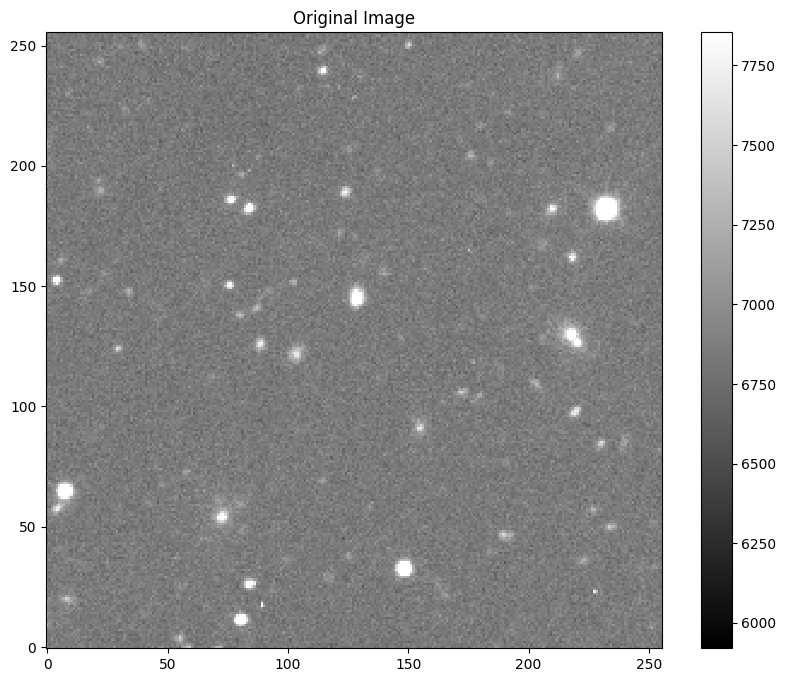

In [22]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.title('Original Image')
plt.savefig('Tutorial_imgs/O_Image.png', bbox_inches='tight')
plt.colorbar();

4. measure the background and how much it varies due to the object.
5. evaluate the background as a 2.d array and plot it.

In [23]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [24]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [25]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

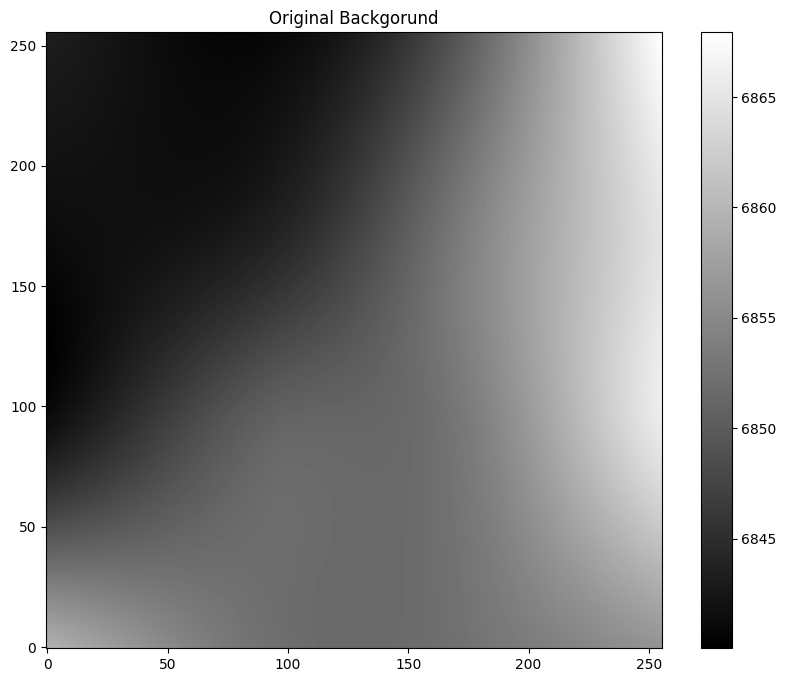

In [26]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.title('Original Backgorund')
plt.savefig('Tutorial_imgs/O_backgrd.png', bbox_inches='tight')

6. get the background noise to evaluate it into a 2-d array
7. plot the backgorund noise

In [27]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

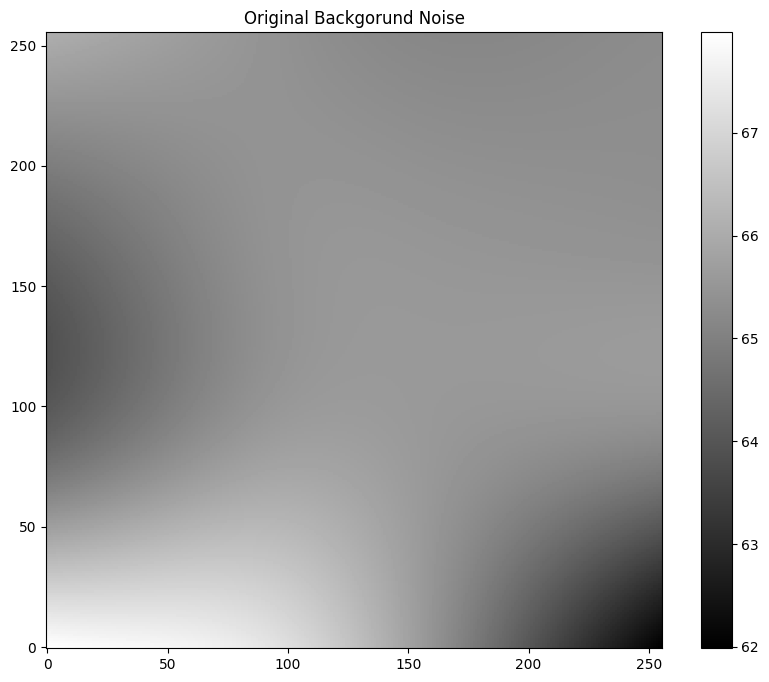

In [28]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.title('Original Backgorund Noise')
plt.savefig('Tutorial_imgs/backgrd_noise.png', bbox_inches='tight')

8. subtract the backgorund from the original image.
9. use sep to extract objects from the image.
10. create ellipes to show where on the image the objects are.

In [29]:
# subtract the background
data_sub = data - bkg

In [30]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [31]:
# how many objects were detected
len(objects)

68

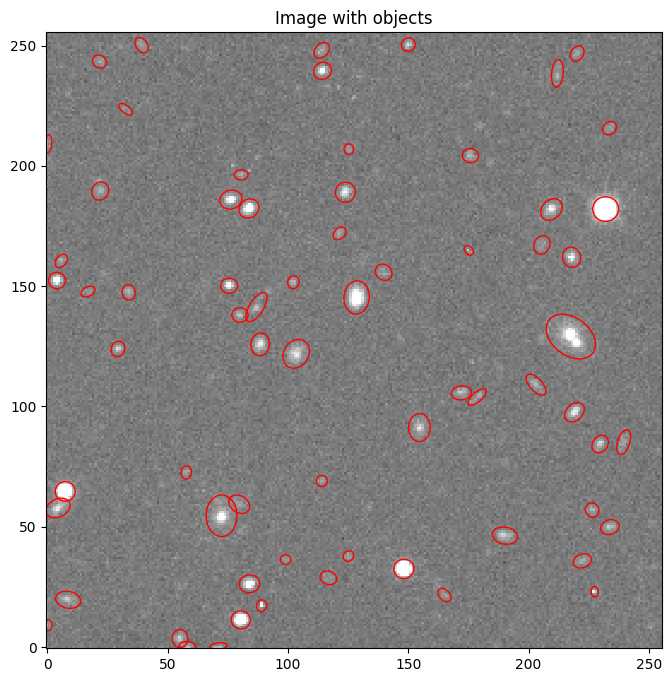

In [32]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.title('Image with objects')
plt.savefig('Tutorial_imgs/image_obj.png', bbox_inches='tight')

11. show what fields object has
12. take out the flux and flux error from the subtracted data and each object in that data

In [33]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [34]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [35]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
